In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jngaravito57/Documents/codes/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


In [23]:
!../../../HackFOF/src/fof -e 0.2 -m 2 < ../coordinates/associations-XYZ.dat

41
done input


In [24]:
fof_groups = loadtxt('fof.grp', skiprows=1)
particles = loadtxt('../coordinates/associations-XYZ.dat',skiprows=6)

In [25]:
print fof_groups.size
print fof_groups

41
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  0.  4.  0.  4.  0.  0.  0.  3.  0.  3.  0.
  0.  0.  0.  0.  0.]


In [16]:
index = where(fof_groups==1)
index = index[0]
x_group = particles[index,0]
y_group = particles[index,1]
z_group = particles[index,2]


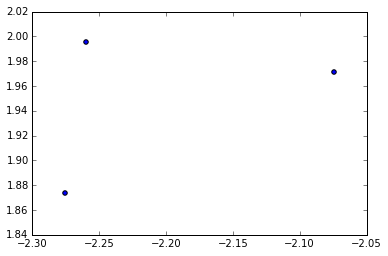

In [12]:
scatter(x_group, z_group)